# Mapa electoral GBA

Tomando los resultados de las PASO generé un mapa con los porcentajes de votos obtenidos en los circuitos electorales correspondientes a los 24 municipios del GBA por las dos principales agrupaciones políticas: Frente de Todos y Juntos por el Cambio. Me interesaba visualizar la distribución del electorado al interior de cada municipio para detectar diferencias zonales dentro de un mismo distrito. De este modo se puede analizar el comportamiento electoral al mínimo nivel de análisis, los circuitos electorales. 
Asimismo, plasmar los resultados geoespacialmente por circuito permite estudiar el comportamiento electoral al mínimo nivel de análisis espacial y hacer inferencias a partir del cruce con otras variables (demográficas y socioeconómicas) distribuidas espacialmente. Para poder hacerlo es necesario empalmar previamente los polígonos de las distintas fuentes de información para que las medidas sean comparables


In [1]:
import pandas as pd
import json
import datetime
import folium
from folium.map import *
#from folium import plugins
#from folium.plugins import MeasureControl
#from folium.plugins import FloatImage

### Mapa de votos al Frente de Todos por circuitos. GBA

In [2]:
## GEOJSON CIRCUITOS
state_geo = r'.\data\dataset.geojson'

## Dataset con resultados por circuito
state_data = pd.read_csv(r'.\data\results.csv')

## Iinicializa Mapa
m = folium.Map(location=(-34.68, -58.526820), zoom_start=10,tiles='CartoDBPositron')

## Mapa Circuitos
circuitos_map = folium.Choropleth(
    geo_data=state_geo,
    name='Frente de Todos',
    data=state_data,
    columns=['CODIGO_CIRCUITO', 'FRENTE DE TODOS'],
    key_on='feature.properties.circuito',
    fill_color='PuBu',
    fill_opacity=0.9,
    line_opacity=0.2, #10,
    #line_weight=0.5,
    #line_color='black',
    highlight=True,
    #smooth_factor=2,
    legend_name='Voto Frente de Todos (%)'
).add_to(m)

folium.GeoJsonTooltip(fields=['departamen', 'circuito', 'FRENTE DE TODOS', 'JUNTOS POR EL CAMBIO',
                              'OTROS','TOTAL_VOTOS'],
                      aliases=['Municipio:', 'Circuito:', 'Frente de Todos (%):',
                               'Juntos Por El Cambio (%):',
                               'Otros (%):','Total votos:'],
                      labels=True,
                      sticky=False,
                      localize=True).add_to(circuitos_map.geojson)
m

Los distritos donde el Frente de Todos obtuvo resultados con mayor varabilidad entre circuitos: San Isidro, San Miguel y San Fernando. Por el contrario, los municipios más homogénos son: Florencio Varela, José C. Paz y Malvinas Argentinas.

<p align="center"/>
  <img src="cuadro FT.png" width="35%"/>
  <img src="FT_plot.png" width="60%"/>
</p>


En San Miguel destaca el circuito 401, donde la fórmula Fernández-Fernández obtuvo 20,28% de los votos sobre un total de 720 (28 puntos porcentuales por debajo de la media del distrito). Ese circuito se ubica en la zona de Campo de Mayo.
Respecto a los otros dos municipios que presentan mayor variabilidad, si bien San Fernando concentra mayor cantidad de circuitos en torno a la media (que es sensiblemente más alta que el promedio de San Isidro), presenta a su vez un rango de valores mayor al del distrito con mayor dispersión. En San Fernando coexisten circuitos donde el Frente de Todos obtuvo alrededor del 65% con circuitos donde no supera el 25%.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
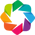

In [3]:
import holoviews as hv
from holoviews import dim
from bokeh.models import HoverTool
import plotly
hv.extension('bokeh')

In [4]:
title = "Distribución del voto a Frente de Todos (%) por circuito."
scatter = hv.Scatter(state_data[state_data['NOMBRE_REGION'].isin(['SAN ISIDRO','SAN FERNANDO'])], 'NOMBRE_REGION', 
                     ['FRENTE DE TODOS','CODIGO_CIRCUITO'],label=title)
tooltips = [
    ('Circuito', '@CODIGO_CIRCUITO'),
    ('Porcentaje', '@{FRENTE DE TODOS}'),
]
hover = HoverTool(tooltips=tooltips)
            
scatter.opts(color=hv.dim('NOMBRE_REGION').categorize({'SAN FERNANDO': 'blue','SAN ISIDRO': 'orange'}),
                          labelled=[None], ylim=(10,70),tools=[hover],height=400, width=500)
scatter

:Scatter   [NOMBRE_REGION]   (FRENTE DE TODOS,CODIGO_CIRCUITO)

## Mapa de votos a Juntos por el Cambio por circuito. GBA

In [5]:
## MAPA PRO
## Iinicializa Mapa
m2 = folium.Map(location=(-34.68, -58.526820), zoom_start=10,tiles='CartoDBPositron')

## Mapa Circuitos
circuitos_map2 = folium.Choropleth(
    geo_data=state_geo,
    name='Juntos Por El Cambio',
    data=state_data,
    columns=['CODIGO_CIRCUITO', 'JUNTOS POR EL CAMBIO'],
    key_on='feature.properties.circuito',
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.2, #10,
    #line_weight=0.5,
    #line_color='black',
    highlight=True,
    #smooth_factor=2,
    legend_name='Voto Juntos Por El Cambio (%)'
).add_to(m2)

folium.GeoJsonTooltip(fields=['departamen', 'circuito', 'FRENTE DE TODOS', 'JUNTOS POR EL CAMBIO',
                              'OTROS','TOTAL_VOTOS'],
                      aliases=['Municipio:', 'Circuito:', 'Frente de Todos (%):',
                               'Juntos Por El Cambio (%):',
                               'Otros (%):','Total votos:'],
                      labels=True,
                      sticky=False,
                      localize=True).add_to(circuitos_map2.geojson)

m2